In [3]:
import os 
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"] = "true"

import json
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from termcolor import colored

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten

from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.metrics import Mean, SparseCategoricalAccuracy

from tensorflow.keras.layers import InputLayer

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import Flatten, Dense, Activation

In [ ]:
# Ex)
# sigmoid = 1/(1+e^(-x))
# d(sigmoid)/dx = sigmoid(x)*(1-sigmoid(x))
# max = 0.25 <- exponentially decrease the abs(gradients)
# - for 7 layers, gradients of the first layer = 0.2^7

# tanh is more robust to gradient vanishing problem in ideal situation but still not solving the problem
# relu is best option so far

# standardization: assume the input follows normal distribution, change to standard normal distribution
# normalization: convert value ranging between 0-1


In [77]:
train_ds,ds_info = tfds.load(name = "mnist",
                              split = "train",
                              shuffle_files=True,
                              as_supervised=True, 
                              with_info = True)

#standardize the input data and change datatype
def normalization(images, labels):
    images = tf.cast(images, tf.float32)/255.
    return [images, labels]

n_layer = 10
cmap = cm.get_cmap("rainbow", lut = n_layer + 1)
units_lst = [10]*n_layer

model = Sequential()
model.add(Flatten())

for layer_indx in range(n_layer -1): #excluding last layer for softmax
    model.add(Dense(units = units_lst[layer_indx], activation = "tanh"))
    
model.add(Dense(units = 10, activation = "softmax"))
model.build(input_shape=(None, 28, 28, 1))

In [78]:
train_batch_size = 10
train_ds_final = train_ds.map(normalization).batch(train_batch_size)

loss_object = SparseCategoricalCrossentropy()
optmizer = SGD()

train_ds_iter = iter(train_ds_final)
images,labels = next(train_ds_iter)

print("images.shape, labels.shape:\t", images.shape, labels.shape)

with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_object(labels, predictions)
    
gradients = tape.gradient(loss, model.trainable_variables)
print("type(gradients):\t", type(gradients))
print("len(gradients):\t", len(gradients)) # weight and bias for 7 layers
print("type(gradients[0]):\t", type(gradients[0]))
print("gradients[0].shape:\t",gradients[0].shape)

images.shape, labels.shape:	 (10, 28, 28, 1) (10,)
type(gradients):	 <class 'list'>
len(gradients):	 20
type(gradients[0]):	 <class 'tensorflow.python.framework.ops.EagerTensor'>
gradients[0].shape:	 (784, 10)


Text(0.5, 1.0, 'Sigmoid')

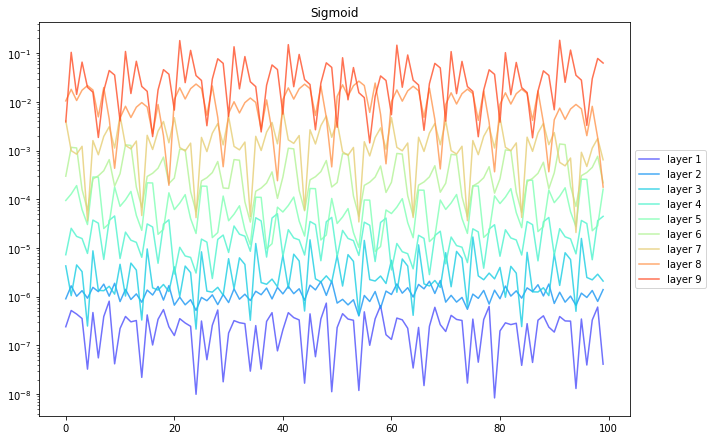

In [73]:
fig, ax = plt.subplots(figsize = (10,6))
ax.set_yscale("log")
for grad_idx, grad in enumerate(gradients[::2]): #extract only weight
    if grad_idx >= 1:
        grad_abs = np.abs(grad.numpy().flat)
        ax.plot(grad_abs,
                label = "layer {}".format(grad_idx),
                color = cmap(grad_idx), 
                alpha = 0.8)
        
ax.legend(bbox_to_anchor = (1,0.5), loc = "center left")
fig.tight_layout()
ax.set_title("Sigmoid")

# showing the early layers' gradient are much smaller 

Text(0.5, 1.0, 'RELU')

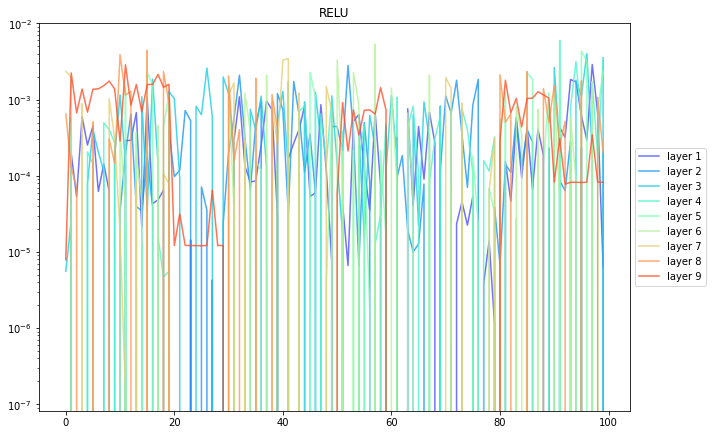

In [76]:
fig, ax = plt.subplots(figsize = (10,6))
ax.set_yscale("log")
for grad_idx, grad in enumerate(gradients[::2]): #extract only weight
    if grad_idx >= 1:
        grad_abs = np.abs(grad.numpy().flat)
        ax.plot(grad_abs,
                label = "layer {}".format(grad_idx),
                color = cmap(grad_idx), 
                alpha = 0.8)
        
ax.legend(bbox_to_anchor = (1,0.5), loc = "center left")
fig.tight_layout()
ax.set_title("RELU")

# showing the early layers' gradient are much smaller 

Text(0.5, 1.0, 'TANH')

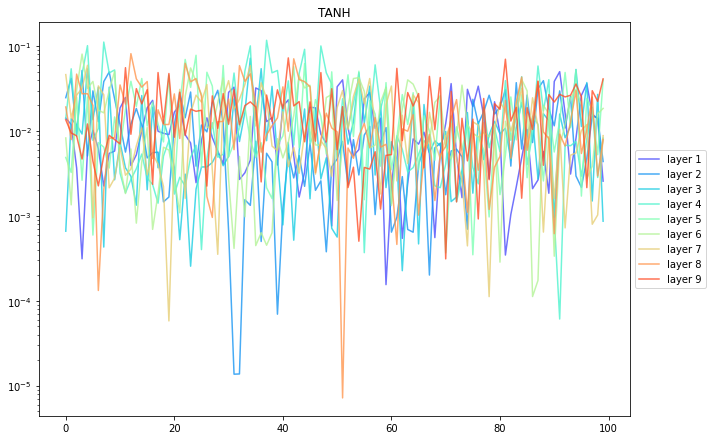

In [79]:
fig, ax = plt.subplots(figsize = (10,6))
ax.set_yscale("log")
for grad_idx, grad in enumerate(gradients[::2]): #extract only weight
    if grad_idx >= 1:
        grad_abs = np.abs(grad.numpy().flat)
        ax.plot(grad_abs,
                label = "layer {}".format(grad_idx),
                color = cmap(grad_idx), 
                alpha = 0.8)
        
ax.legend(bbox_to_anchor = (1,0.5), loc = "center left")
fig.tight_layout()
ax.set_title("TANH")

# showing the early layers' gradient are much smaller 